In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# TODO: Add quicksort when fixed
sort_algos = ["SelectionSort", "InsertionSort", "MergeSort", "CountingSort", "NativeSort", "HeapSort"]

# Load data

In [4]:
data={}
for x in sort_algos:
        data[x]=pd.read_csv("./data/" + x + ".csv")

### Run this cell to visualize all the raw data

In [5]:
for algo, df in data.items():
    print(algo)
    print(df.head(),"\n")

SelectionSort
   power     start_time      stop_time
0      1  1569859280050  1569859280066
1      2  1569859280070  1569859280075
2      3  1569859280078  1569859280082
3      4  1569859280090  1569859280099
4      5  1569859280103  1569859280129 

InsertionSort
   power     start_time      stop_time
0      1  1569859317286  1569859317289
1      2  1569859317290  1569859317292
2      3  1569859317293  1569859317295
3      4  1569859317297  1569859317300
4      5  1569859317303  1569859317308 

MergeSort
   power     start_time      stop_time
0      1  1569859319277  1569859319288
1      2  1569859319288  1569859319293
2      3  1569859319294  1569859319304
3      4  1569859319306  1569859319332
4      5  1569859319335  1569859319368 

CountingSort
   power     start_time      stop_time
0      1  1569859320359  1569859320410
1      2  1569859320410  1569859320448
2      3  1569859320449  1569859320467
3      4  1569859320469  1569859320488
4      5  1569859320491  1569859320536 

Nativ

### Run the next 2 cells to see first dataframe and quick metrics about it

In [6]:
data[sort_algos[0]].head()

,power,start_time,stop_time
0,1,1569859280050,1569859280066
1,2,1569859280070,1569859280075
2,3,1569859280078,1569859280082
3,4,1569859280090,1569859280099
4,5,1569859280103,1569859280129


In [7]:
data[sort_algos[0]].describe()

,power,start_time,stop_time
count,10.00000,1.000000e+01,1.000000e+01
mean,5.50000,1.569859e+12,1.569859e+12
std,3.02765,3.020623e+03,1.168416e+04
min,1.00000,1.569859e+12,1.569859e+12
25%,3.25000,1.569859e+12,1.569859e+12
50%,5.50000,1.569859e+12,1.569859e+12
75%,7.75000,1.569859e+12,1.569859e+12
max,10.00000,1.569859e+12,1.569859e+12


# Creating the new features

- running time in miliseconds<br>
...

In [8]:
for algo, df in data.items():
    df["run_time"] = df.loc[:,"stop_time"] - df.loc[:,"start_time"]


In [9]:
data[sort_algos[0]].head()

,power,start_time,stop_time,run_time
0,1,1569859280050,1569859280066,16
1,2,1569859280070,1569859280075,5
2,3,1569859280078,1569859280082,4
3,4,1569859280090,1569859280099,9
4,5,1569859280103,1569859280129,26


# Plotting runtime for each sort

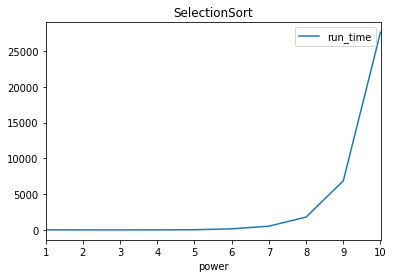

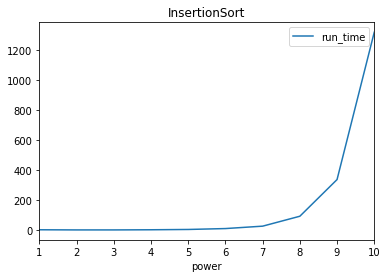

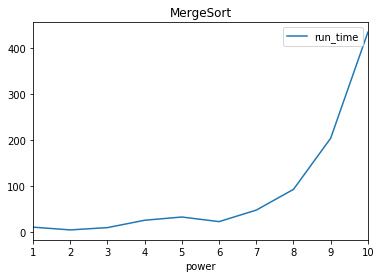

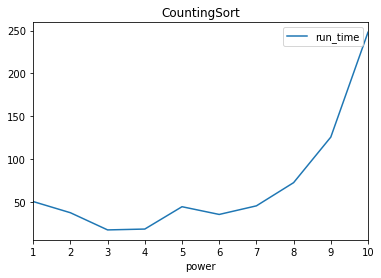

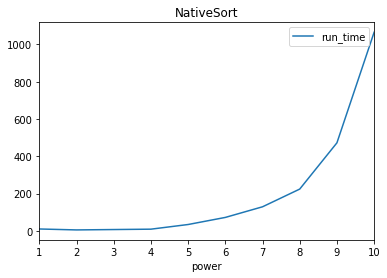

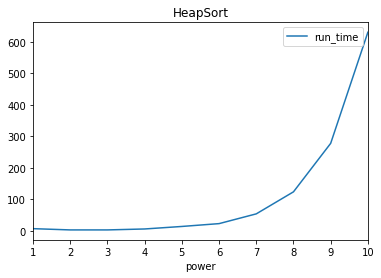

In [17]:
# INDIVIDUAL PLOT
for algo, df in data.items():
    # simply plotting without the log add param `logx = True` or `logy = True` for log on x or y axis to the plot function
    # check pandas dataframe.plot() for more details
    df.plot(x='power', y='run_time', title=algo)
plt.show()

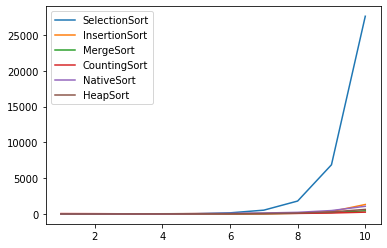

In [21]:
# GROUPED PLOT
fig = plt.figure()

for algo, df in data.items():
    plt.plot(df.loc[:,"power"], df.loc[:,"run_time"], label=algo)

plt.legend()
plt.show()

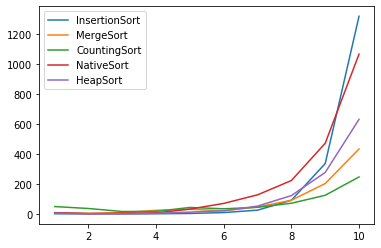

In [22]:
# GROUPED PLOT
fig = plt.figure()

for algo, df in data.items():
    if algo is not "SelectionSort":
        plt.plot(df.loc[:,"power"], df.loc[:,"run_time"], label=algo)

plt.legend()
plt.show()